In [1]:
# %matplotlib inline
import pandas as pd
import sklearn
import numpy as np
from IPython.display import display
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
plt.rcParams['font.family']='TH SarabunPSK' #you can change to other font that works for you
plt.rcParams.update({'font.size': 50})
#fill your code here

In [3]:
import seaborn as sns
sns.set(style="darkgrid")

In [4]:
input_standard = pd.read_csv('the_standard_data_no_content.csv')

In [5]:
input_standard.head()

,headline,date,time,view,like,share,comment,category,tag,DOW
0,ประวิตร เชื่อ ‘ผบ.ทบ.’ เจตนาดี อยากเห็นบ้านเมื...,05/04/2562,NaN,181000,NaN,NaN,NaN,"Thailand,Politics","ประวิตร วงษ์สุวรรณ,อภิรัชต์ คงสมพงษ์",FRI
1,‘ดุสิต เซ็นทรัล พาร์ค’ ปรากฏการณ์มิกซ์ยูส 3.67...,03/04/2562,NaN,749000,NaN,NaN,NaN,Business,"บริษัท เซ็นทรัลพัฒนา จำกัด (มหาชน),โรงแรมดุสิต...",WED
2,แบงก์ชาติผลักดันการใช้เงินสกุลท้องถิ่น ลดภาระผ...,05/04/2562,NaN,200000,NaN,NaN,NaN,Business,"Asean,ธนาคารแห่งประเทศไทย",FRI
3,วาฬตั้งท้องเกยตื้นตายริมชายหาดอิตาลี พบขยะพลาส...,02/04/2562,NaN,124000,NaN,NaN,NaN,Environment,"ขยะในทะเล,ขยะพลาสติก",TUE
4,วีซ่าเผย E-Payment เติบโตต่อเนื่อง กลุ่มตัวอย่...,03/04/2562,NaN,62000,NaN,NaN,NaN,Business,"e-payment,visa,Cashless Society",WED


In [6]:
print("number of news : ", len(input_standard))
print("number of category : ", len(input_standard.category.unique()))
print("max view : ", input_standard.view.max())
print("min view : ", input_standard.view.min())
# print("number of news : ", len(input_standard))

number of news :  9640
number of category :  251
max view :  304438000
min view :  2000


In [7]:
input_standard.sort_values(by=['view'], ascending=False)[:20]

,headline,date,time,view,like,share,comment,category,tag,DOW
4767,เด็กหญิงไทยวัย 11 ปี แต่งงานเป็นเมียคนที่ 3 ขอ...,02/07/2561,NaN,304438000,NaN,NaN,NaN,"World,Thailand","สิทธิมนุษยชน,สิทธิสตรี,ความจน,สิทธิเด็ก",MON
3496,ทำความเข้าใจก่อนไปเลือกตั้ง ส.ส. ใช้บัตรใบเดีย...,03/10/2561,NaN,270181000,NaN,NaN,NaN,"Thailand,Politics","การเลือกตั้ง,กกต.,ส.ส.,รัฐธรรมนูญ 2560,ส.ส. แบ...",WED
7187,PM2.5 ฝุ่นละอองขนาดเล็กในอากาศ กับวิกฤตสุขภาพท...,26/01/2561,NaN,190406000,NaN,NaN,NaN,Environment,"สิทธิมนุษยชน,องค์การสหประชาชาติ (UN),โรคภูมิแพ...",FRI
3188,วิชัย ศรีวัฒนประภา จากเด็กปั๊มสู่อาณาจักรแสนล้...,29/10/2561,NaN,175270000,NaN,NaN,NaN,"Thailand,Business","Leicester City,คิง เพาเวอร์,วิชัย ศรีวัฒนประภา",MON
269,สถานการณ์ล่าสุด: เกาะติดทุกความเคลื่อนไหวการเล...,24/03/2562,NaN,157804000,NaN,NaN,NaN,"Thailand,Politics","พรรคประชาธิปัตย์,พรรคพลังประชารัฐ,พรรคอนาคตใหม...",SUN
4715,รู้จักฮีโร่กว่า 50 หน่วยงาน ร่วมช่วย 13 ชีวิตต...,10/07/2561,NaN,136448000,NaN,NaN,NaN,Thailand,"dtac,AIS,Cat,กรมชลประทาน,TOT,True,กระทรวงทรัพย...",TUE
5948,10 อันดับเศรษฐีไทยปี 2561 เจียรวนนท์ยังครองเบอ...,03/05/2561,NaN,124038000,NaN,NaN,NaN,"Thailand,Business","Forbes,THAIBEV,จิราธิวัฒน์,เจียรวนนท์,กระทิงแด...",THU
919,วิษณุย้ำ ประยุทธ์เป็นเจ้าหน้าที่รัฐ ยันไม่เคยพ...,04/03/2562,NaN,116277000,NaN,NaN,NaN,"Thailand,Politics","ประยุทธ์ จันทร์โอชา,วิษณุ เครืองาม",MON
2339,รู้จัก ZEPETO แอปพลิเคชันสร้างคาแรกเตอร์เสมือน...,04/12/2561,NaN,95878000,NaN,NaN,NaN,"Business,Tech","line,Apple Store,AR,Google Play,ZEPETO,SNOW Co...",TUE
382,“เป็นเจ้าหญิงก็โดนวิจารณ์ได้” พระองค์หญิงสิริว...,28/03/2562,NaN,95027000,NaN,NaN,NaN,"Thailand,Art & Design",พระเจ้าหลานเธอ พระองค์เจ้าสิริวัณณวรีนารีรัตน์,THU


In [8]:
input_standard.sort_values(by=['view'], ascending=True)[:20]

,headline,date,time,view,like,share,comment,category,tag,DOW
8689,‘ดูเตร์เต’ ลั่นปลดแอกมาราวีจากกลุ่มสวามิภักดิ์...,18/10/2560,NaN,2000,NaN,NaN,NaN,World,"ก่อการร้าย,ISIS,Philippines,Rodrigo Duterte,เม...",WED
7920,เกาหลีเหนืออ้าง พัฒนาขีปนาวุธพิสัยไกลครอบคลุมท...,29/11/2560,NaN,3000,NaN,NaN,NaN,World,"North Korea,เกาหลีเหนือ,Hwasong-15",WED
7652,เพื่อไทยคาด เร็วๆ นี้รู้ ยิ่งลักษณ์อยู่ไหน -ยื...,10/01/2561,NaN,3000,NaN,NaN,NaN,"Thailand,Politics","คสช.,ยิ่งลักษณ์ ชินวัตร,ประยุทธ์ จันทร์โอชา,พร...",WED
7020,แนวร่วมหนุน พล.อ. ประวิตร หน้ากลาโหม รายงานตัว...,05/02/2561,NaN,3000,NaN,NaN,NaN,"Thailand,Politics","คสช.,ประวิตร วงษ์สุวรรณ,การชุมนุมทางการเมือง,พ...",MON
9317,เหลือ 2 นัด! ไต่สวนพยาน ‘ยิ่งลักษณ์’ คาดสิงหาค...,29/06/2560,NaN,3000,NaN,NaN,NaN,Thailand,"ยิ่งลักษณ์ ชินวัตร,การเมือง,พรรคเพื่อไทย",THU
5301,ทรัมป์เผย ทีมผู้แทนสหรัฐฯ เดินทางหารือกับเกาหล...,28/05/2561,NaN,3000,NaN,NaN,NaN,World,"ขีปนาวุธข้ามทวีป (ICBM),North Korea,อาวุธนิวเค...",MON
9354,ยืดเส้นตายให้ 2 วัน! ชาติอาหรับขยายเส้นตายข้อเ...,03/07/2560,NaN,3000,NaN,NaN,NaN,World,"Qatar,Saudi Arabia",MON
8453,“มานั่งส่งพ่อเป็นครั้งสุดท้าย” สะพานพระปิ่นเกล...,26/10/2560,NaN,4000,NaN,NaN,NaN,"Thailand,King Rama 9","พระบาทสมเด็จพระปรมินทรมหาภูมิพลอดุลยเดช,พระราช...",THU
9551,บัลลังก์ Uber สะเทือนอีกครั้ง หลังบอร์ดเตรียมพ...,13/06/2560,NaN,4000,NaN,NaN,NaN,Business,"Google,Uber,Travis Kalanick,Waymo",TUE
9126,‘ริฮานน่า’ พบ ‘มาครง’ กระตุ้นระดมทุนการศึกษา ช...,27/07/2560,NaN,4000,NaN,NaN,NaN,World,"Rihanna,Emmanuel Macron,Global Partnership for...",THU


In [96]:
# axes = plt.subplots(211,figsize=(20,20))
# ax = sns.distplot(input_standard['view'])

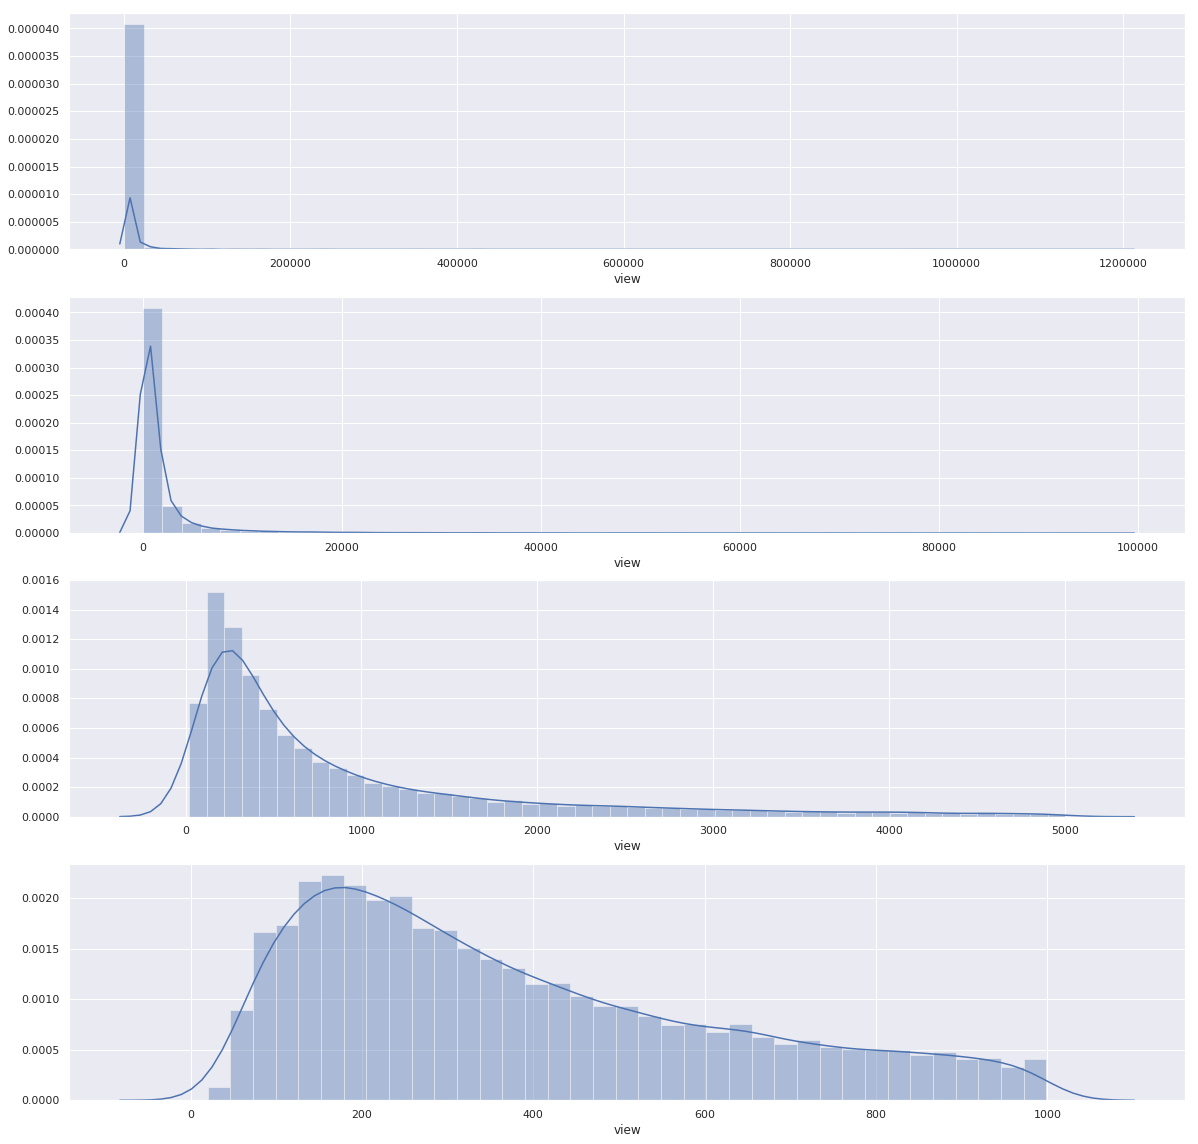

In [97]:
f, axarr = plt.subplots(4, figsize=(20,20))
sns.distplot(input_standard['view'],ax=axarr[0])
sns.distplot(input_standard[input_standard['view']<100000]['view'],ax=axarr[1])
sns.distplot(input_standard[input_standard['view']<5000]['view'],ax=axarr[2])
sns.distplot(input_standard[input_standard['view']<1000]['view'],ax=axarr[3])

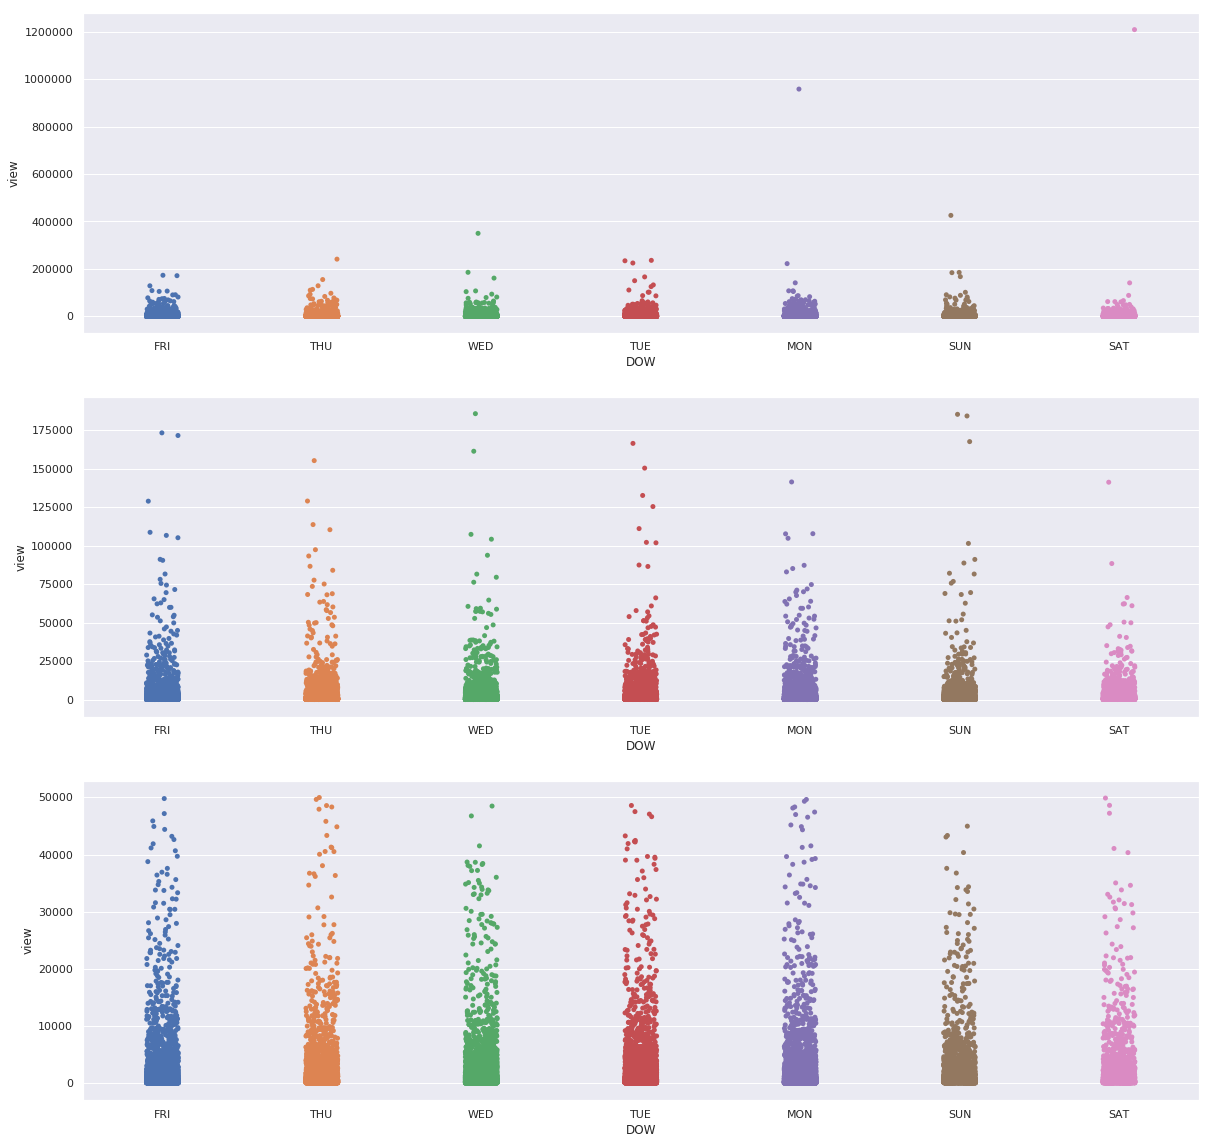

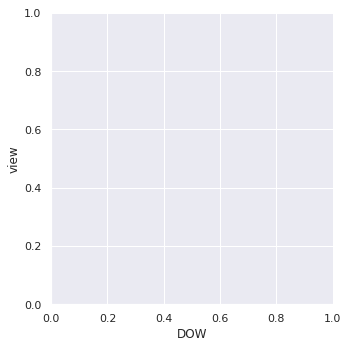

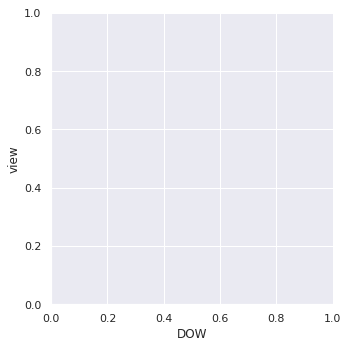

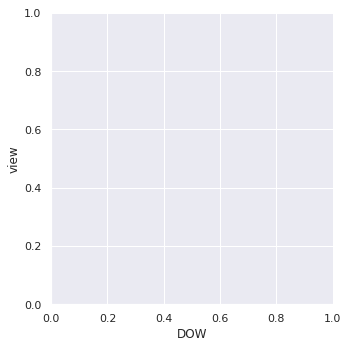

In [98]:
# plt.figure(figsize=(40,20))
fig , ax = plt.subplots(3,figsize=(20,20))
sns.catplot( ax=ax[0], x="DOW", y="view", data=input_standard )
sns.catplot( ax=ax[1], x="DOW", y="view", data=input_standard[input_standard['view']<200000])
sns.catplot( ax=ax[2], x="DOW", y="view", data=input_standard[input_standard['view']<50000])

In [99]:
input_standard['hour'] = input_standard['time'].str.split(':', expand = True)[0]

In [100]:
input_standard.head()

,headline,date,DOW,time,view,category,tag,hour
0,ฝุ่น PM2.5 : ทส.เตรียมตั้งศูนย์แก้ปัญหาหมอกควั...,05/04/2562,FRI,19:37,177,สิ่งแวดล้อม,"ฝุ่นเชียงใหม่,ฝุ่นPM2.5,ฝุ่นคลุมเมือง,เชียงใหม...",19
1,"เลือกตั้ง 2562 : ""เพื่อไทย"" เตรียมยื่น กกต.จัด...",05/04/2562,FRI,19:20,702,การเมือง,"เลือกตั้ง62,เพื่อ่ไทย,กกต.,นับคะแนน,ไทยพีบีเอส...",19
2,เตรียมเอาผิด รพ.เอกชน 58 แห่งไม่ส่งข้อมูลราคายา,05/04/2562,FRI,19:18,583,สาธารณสุข,"ยา,เวชภัณฑ์ฯ,โรงพยาบาล,ค่าบริการทางการแพทย์,กร...",19
3,ตั้งข้อสังเกตปลดล็อกกัญชา เอื้อนายทุนหรือไม่?,05/04/2562,FRI,19:16,928,อาชญากรรม,"กัญชา,มูลนิธิข้าวขวัญ,ThaiPBSnews",19
4,"คำพิพากษาเต็ม ""เปรมชัย"" หลุดคดีครอบครองซากเสือดำ",05/04/2562,FRI,19:29,5163,สิ่งแวดล้อม,"เสือดำ,เปรมชัย,เขตรักษาพันธุ์สัตว์ป่าทุ่งใหญ่น...",19


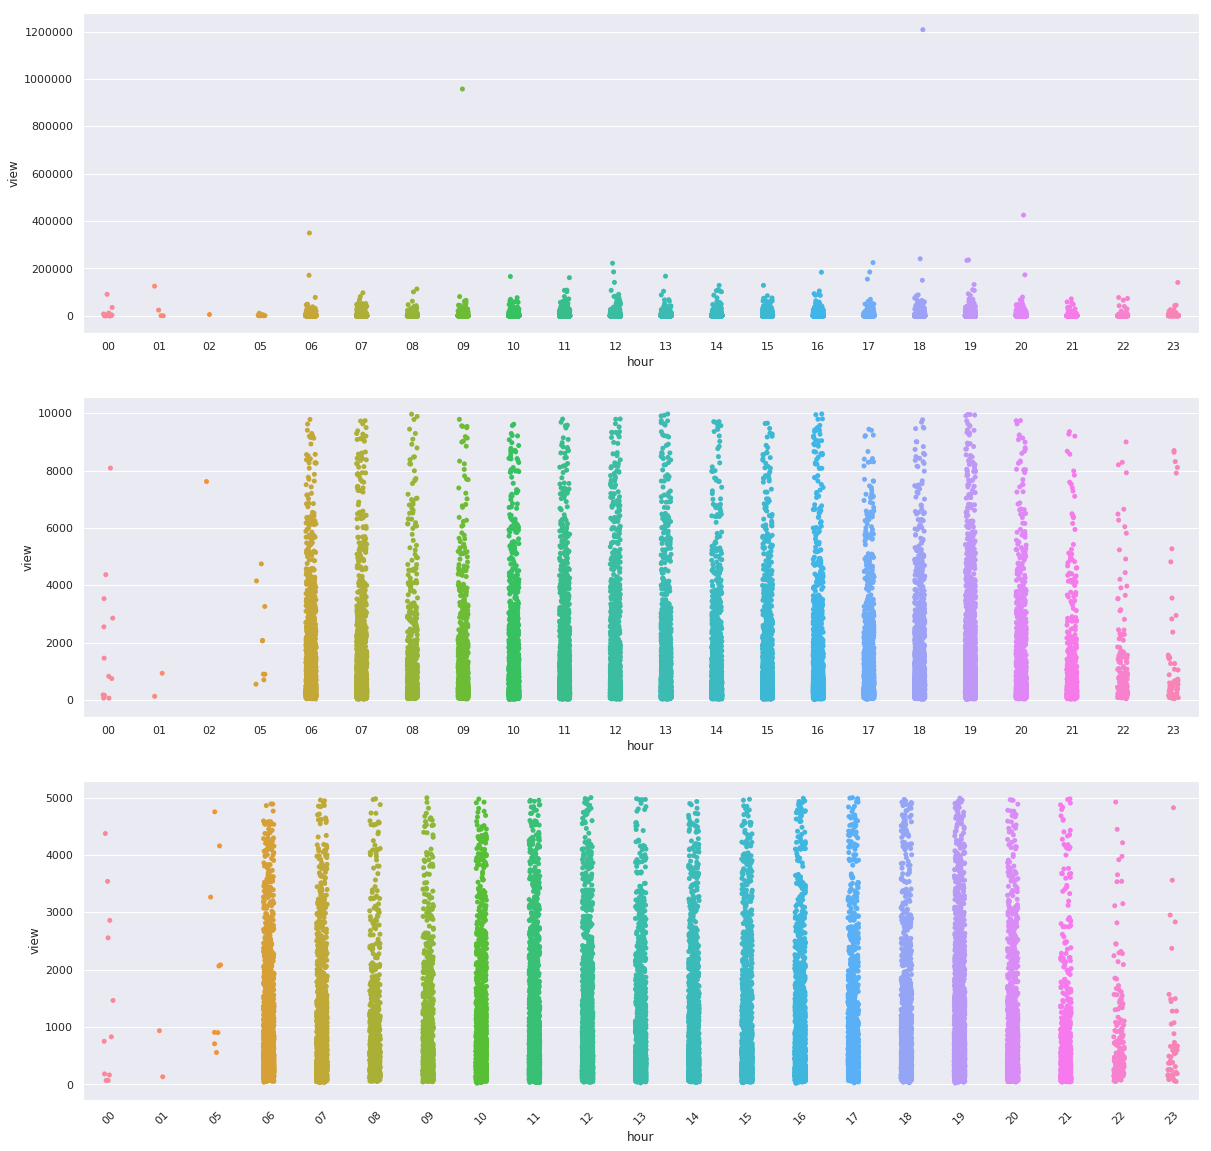

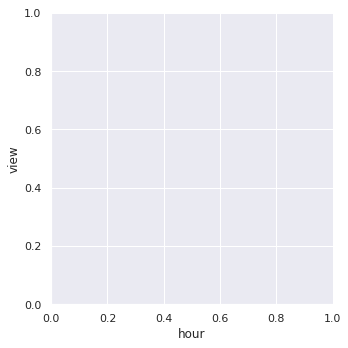

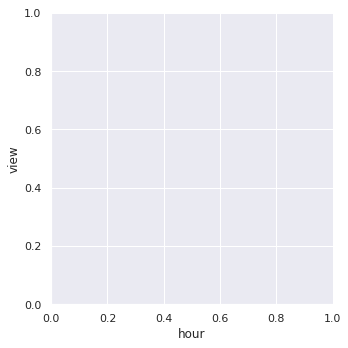

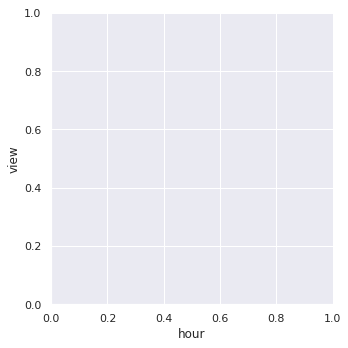

In [104]:
# plt.figure(figsize=(40,20))
fig , ax = plt.subplots(3,1,figsize=(20,20))
plt.xticks(rotation=45)
# sns.catplot( ax =ax[0],x="hour", y="view", data=input_standard )
sns.catplot( ax=ax[0], x="hour", y="view", data=input_standard)
sns.catplot( ax=ax[1], x="hour", y="view", data=input_standard[input_standard['view']<10000])
sns.catplot( ax=ax[2], x="hour", y="view", data=input_standard[input_standard['view']<5000])

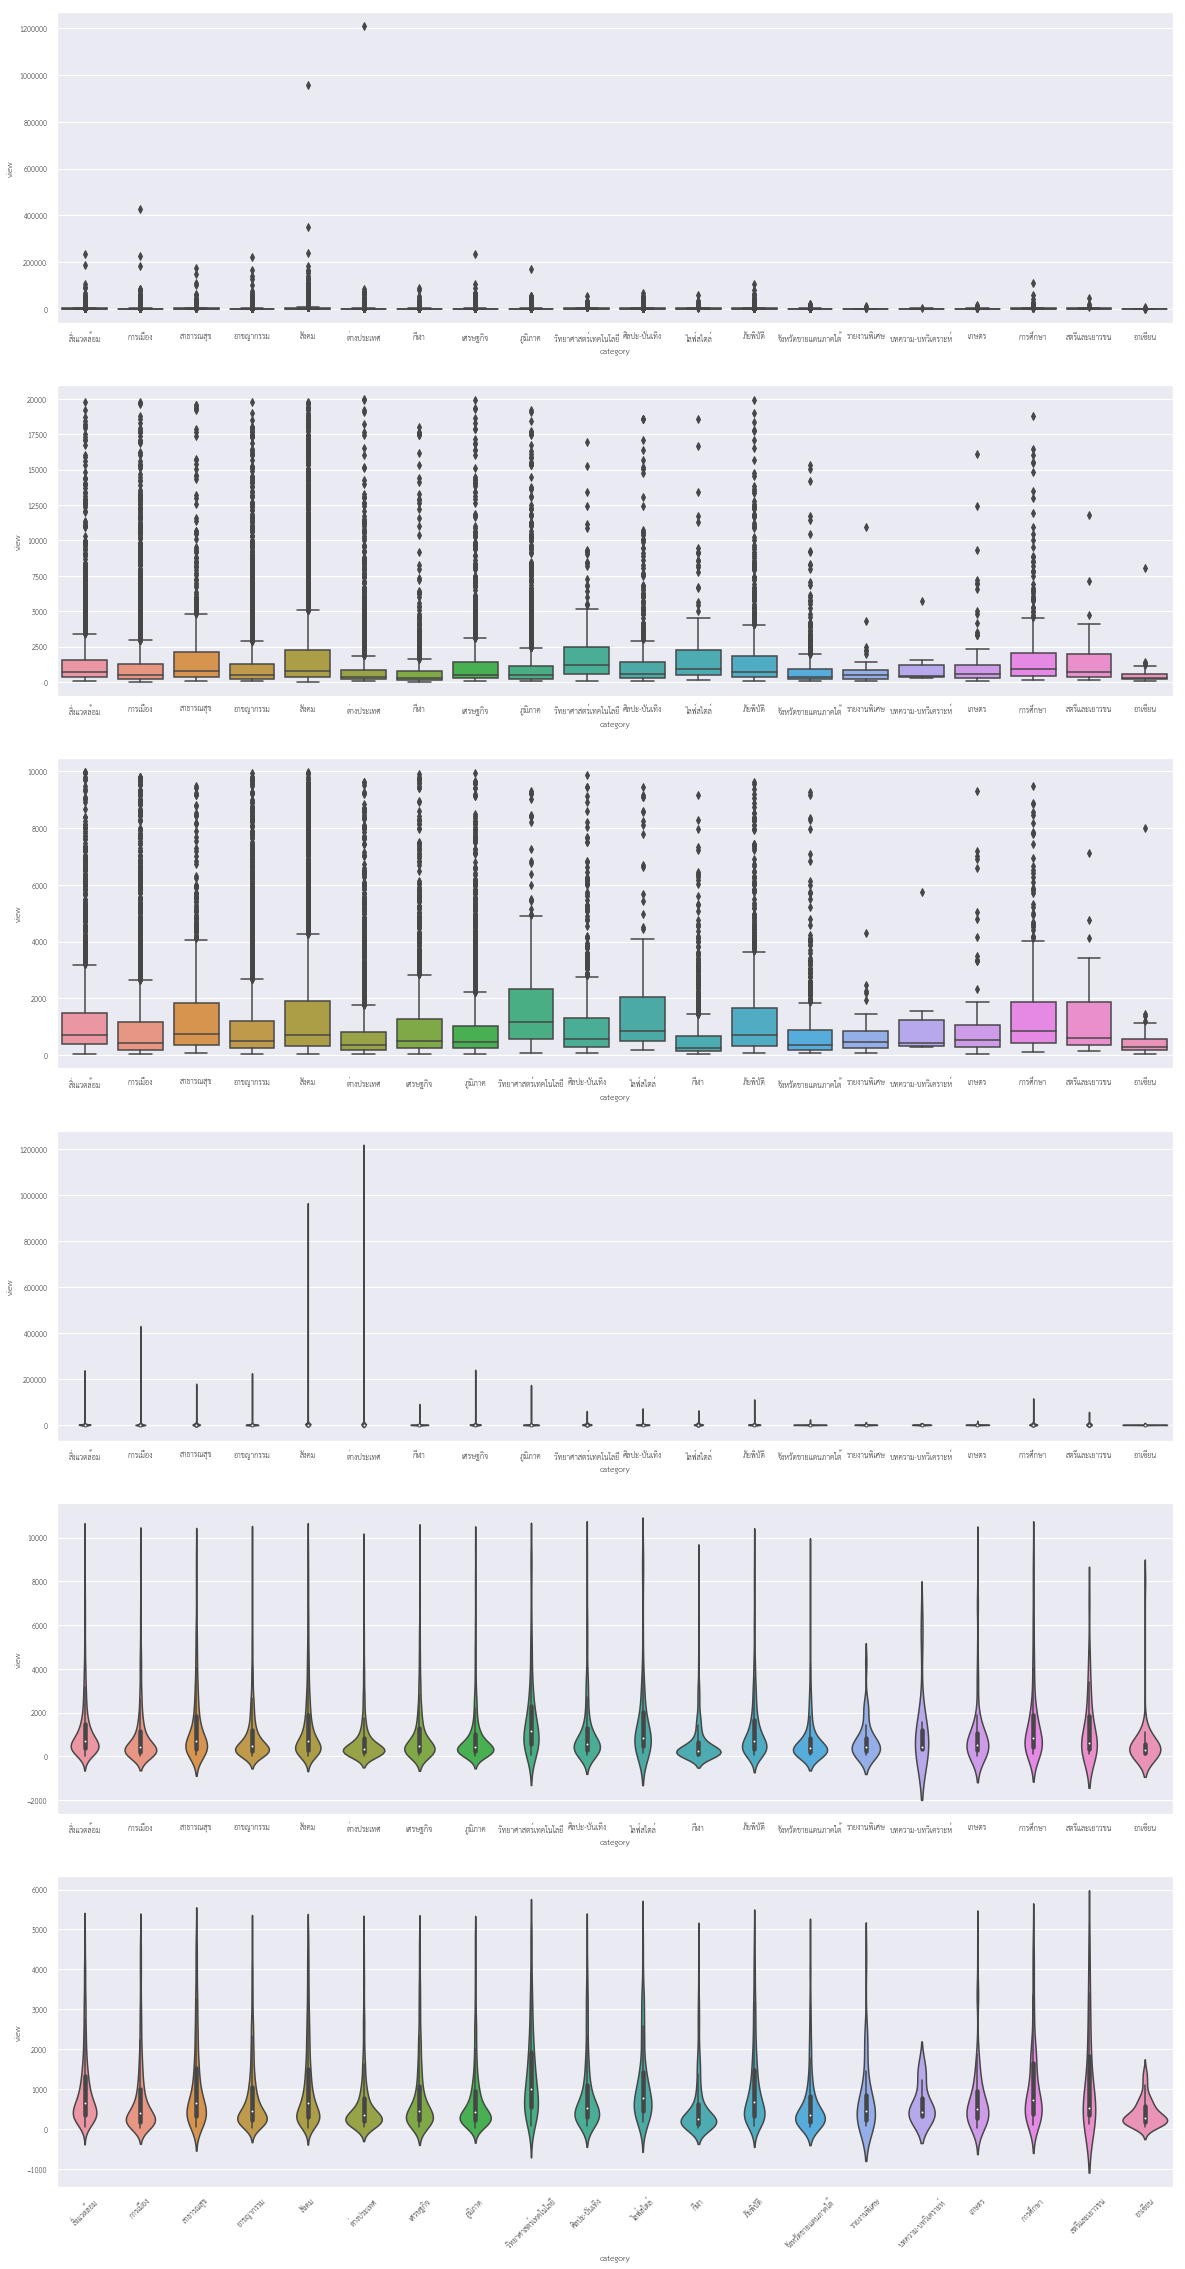

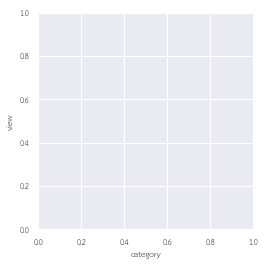

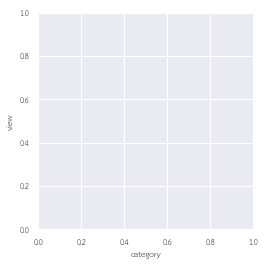

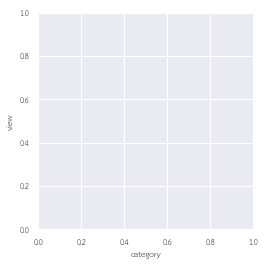

In [109]:
# plt.figure(figsize=(40,20))
fig , ax = plt.subplots(6,1,figsize=(20,40))
plt.xticks(rotation=45)
# sns.catplot( ax =ax[0],x="hour", y="view", data=input_standard )
sns.catplot( ax=ax[0], x="category", y="view",kind="box", data=input_standard)
sns.catplot( ax=ax[1], x="category", y="view",kind="box",data=input_standard[input_standard['view']<20000])
sns.catplot( ax=ax[2], x="category", y="view", kind="box",data=input_standard[input_standard['view']<10000])
sns.violinplot( ax=ax[3], x="category", y="view", data=input_standard)
sns.violinplot( ax=ax[4], x="category", y="view",data=input_standard[input_standard['view']<10000])
sns.violinplot( ax=ax[5], x="category", y="view",data=input_standard[input_standard['view']<5000])

In [110]:
input_standard['numTag'] = input_standard['tag'].apply( lambda x : len(str(x).split(',')))

In [111]:
input_standard.head()

,headline,date,DOW,time,view,category,tag,hour,numTag
0,ฝุ่น PM2.5 : ทส.เตรียมตั้งศูนย์แก้ปัญหาหมอกควั...,05/04/2562,FRI,19:37,177,สิ่งแวดล้อม,"ฝุ่นเชียงใหม่,ฝุ่นPM2.5,ฝุ่นคลุมเมือง,เชียงใหม...",19,10
1,"เลือกตั้ง 2562 : ""เพื่อไทย"" เตรียมยื่น กกต.จัด...",05/04/2562,FRI,19:20,702,การเมือง,"เลือกตั้ง62,เพื่อ่ไทย,กกต.,นับคะแนน,ไทยพีบีเอส...",19,6
2,เตรียมเอาผิด รพ.เอกชน 58 แห่งไม่ส่งข้อมูลราคายา,05/04/2562,FRI,19:18,583,สาธารณสุข,"ยา,เวชภัณฑ์ฯ,โรงพยาบาล,ค่าบริการทางการแพทย์,กร...",19,9
3,ตั้งข้อสังเกตปลดล็อกกัญชา เอื้อนายทุนหรือไม่?,05/04/2562,FRI,19:16,928,อาชญากรรม,"กัญชา,มูลนิธิข้าวขวัญ,ThaiPBSnews",19,3
4,"คำพิพากษาเต็ม ""เปรมชัย"" หลุดคดีครอบครองซากเสือดำ",05/04/2562,FRI,19:29,5163,สิ่งแวดล้อม,"เสือดำ,เปรมชัย,เขตรักษาพันธุ์สัตว์ป่าทุ่งใหญ่น...",19,5


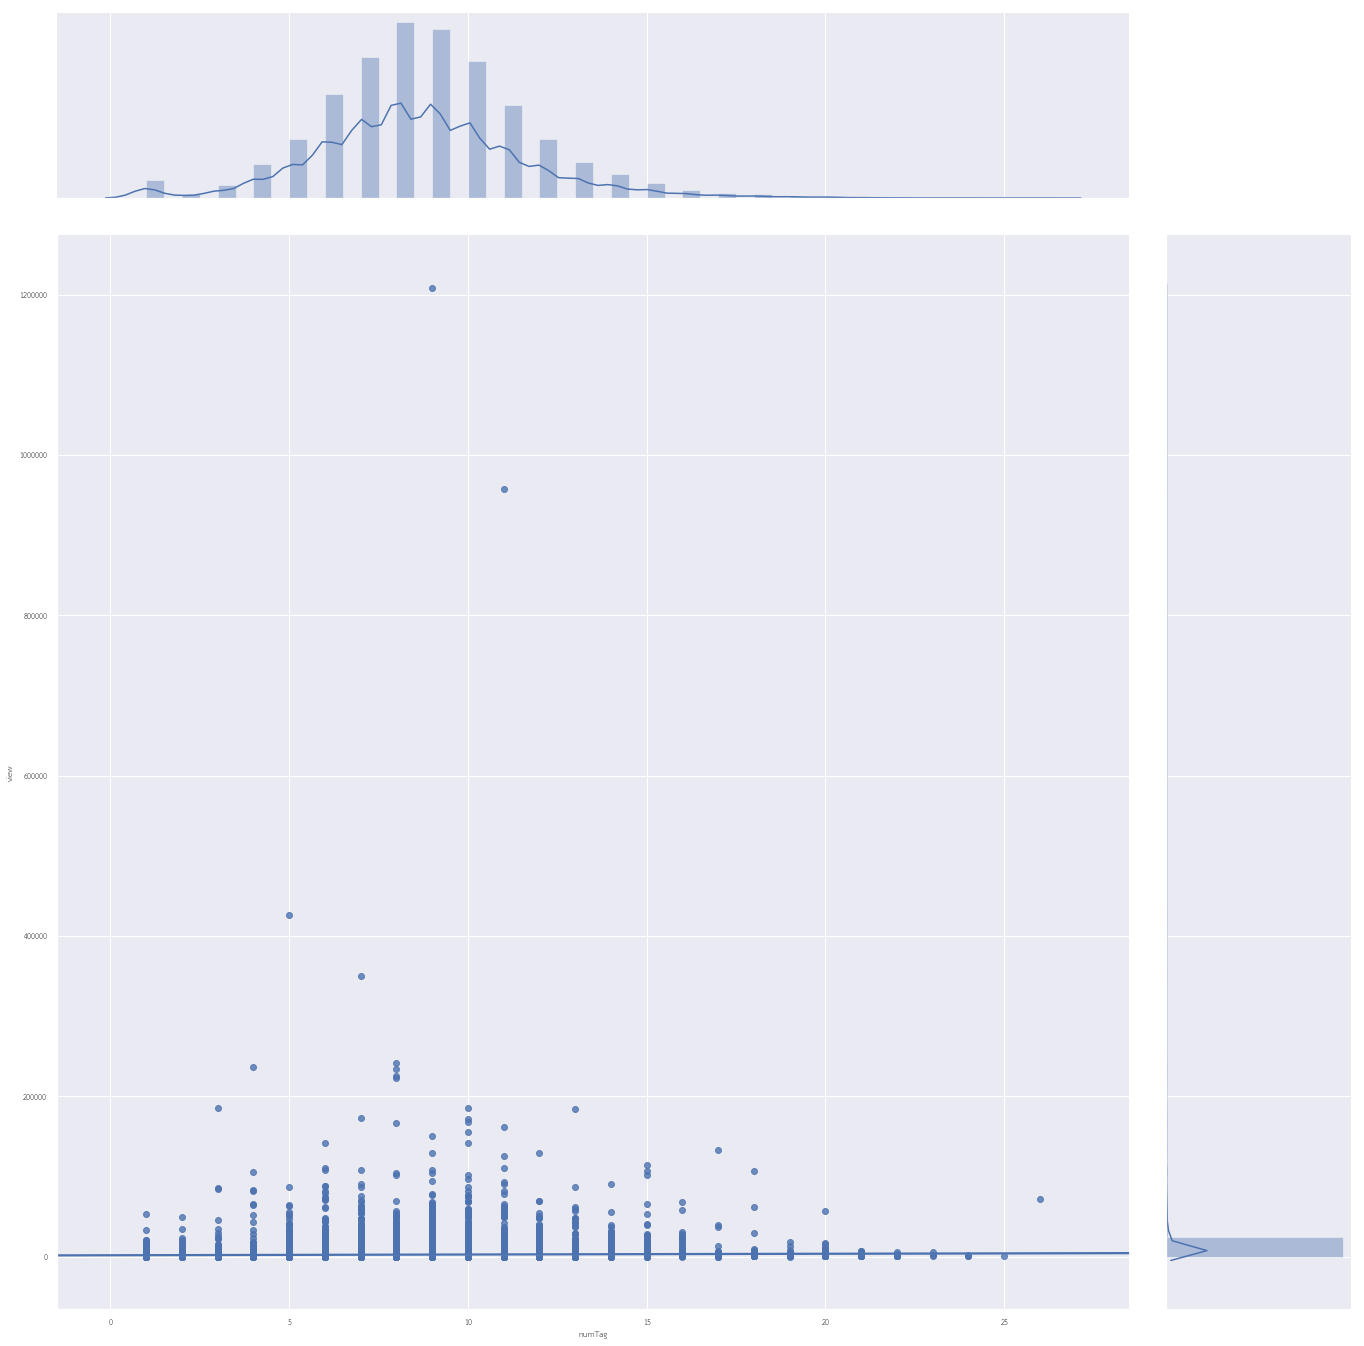

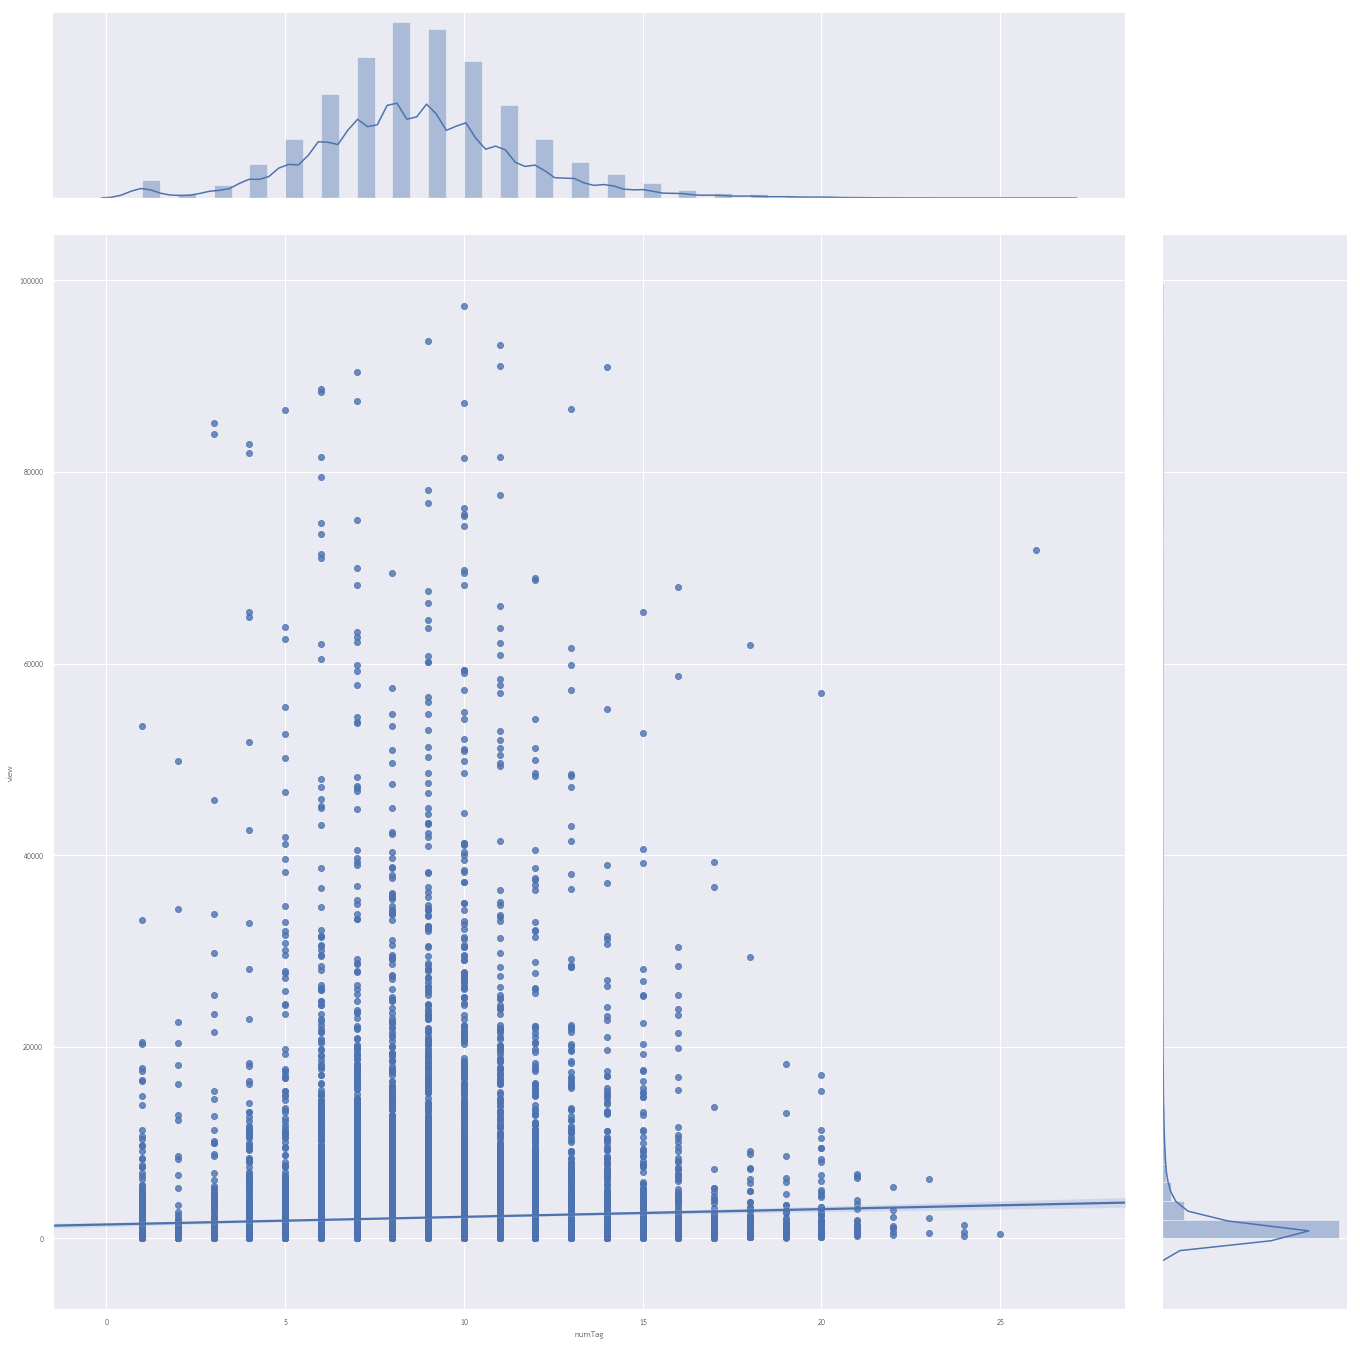

In [112]:
sns.jointplot("numTag", "view", data=input_standard, kind="reg",height=20 )
sns.jointplot("numTag", "view", data=input_standard[input_standard['view']<100000], kind="reg",height=20 )